<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/15Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras import layers, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train , y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

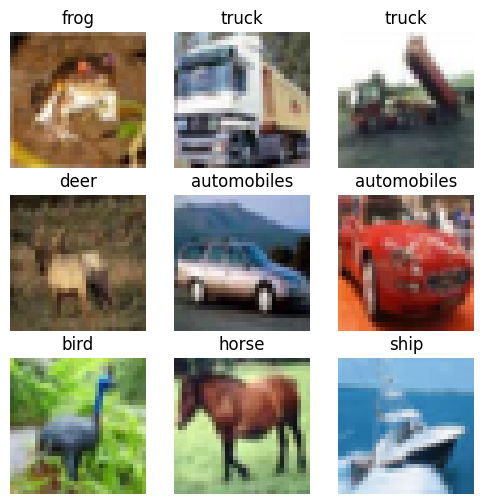

In [7]:
class_names = ['airplane' , 'automobiles' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

plt.figure(figsize=(6 , 6))
for i in range(9):
  plt.subplot(3 , 3 , i + 1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.axis('off')

plt.show()

In [8]:
# Normalization

x_train = x_train / 255.0
x_test = x_test / 255.0

# because neural network easily understand the values of 0s and 1s

In [10]:
model = models.Sequential([
    layers.Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (32 , 32 , 3)),
    # (3 , 3) in the second parameter is basically the filter size
    layers.MaxPooling2D((2 , 2)),

    layers.Conv2D(64 , (3 , 3) , activation = 'relu'),
    layers.MaxPooling2D((2 , 2)),

    layers.Flatten(),
    layers.Dense(128 , activation='relu'),
    layers.Dense(10 , activation ='softmax')

])

# this is not necessary to put 3 layers if there are less pixels images like 32 x 32 so we can use 2 or less layers of Convolution and MaxPooling

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', # labels are in integer thats why we can use only categorical no issues
    metrics = ['accuracy']
)

In [14]:
history = model.fit(x_train , y_train , epochs = 10 , validation_data = (x_test , y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.6211 - loss: 1.0765 - val_accuracy: 0.6619 - val_loss: 0.9743
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6895 - loss: 0.8886 - val_accuracy: 0.6805 - val_loss: 0.9174
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7348 - loss: 0.7556 - val_accuracy: 0.7046 - val_loss: 0.8651
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7752 - loss: 0.6432 - val_accuracy: 0.7091 - val_loss: 0.8584
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8071 - loss: 0.5520 - val_accuracy: 0.7170 - val_loss: 0.8730
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.8338 - loss: 0.4788 - val_accuracy: 0.7129 - val_loss: 0.9230
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8639 - loss: 0.3929 - val_accuracy: 0.7101 - val_loss: 0.9763
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8845 -

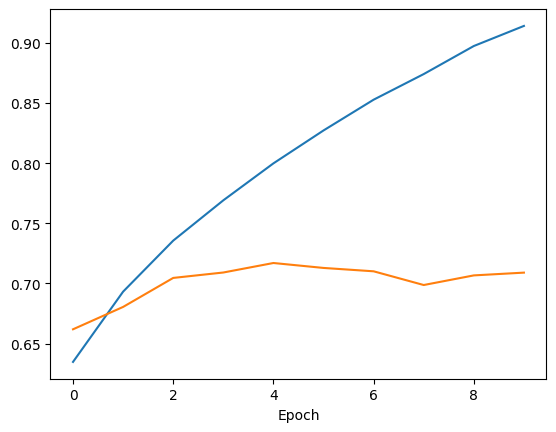

In [15]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epoch')
plt.show()

In [16]:
from keras.preprocessing import image

new_img = image.load_img('horse.jfif' , target_size = (32 , 32))
img_arr = image.img_to_array(new_img)
img_arr_N = img_arr / 255.0
img_arr_N = np.expand_dims(img_arr_N , axis = 0) # dimensions ko fix karne keliye use np.expand cuz model 4dims pr train hua hai and the actual image dim is 3


In [17]:
prediction = model.predict(img_arr_N)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[5.0122713e-07, 2.9534090e-11, 2.0573810e-07, 5.8669980e-10,
        7.8639681e-09, 8.0961093e-10, 6.5061624e-14, 9.9982834e-01,
        3.0535288e-09, 1.7091958e-04]], dtype=float32)

In [19]:
predicted = np.argmax(prediction)
class_names[predicted]

'horse'